# **VACCINE PREDICTION PROJECT**
## BUSINESS UNDERSTANDING
### OVERVIEW
H1N1, commonly referred to as swine flu, is a subtype of the influenza A virus that can infect humans, birds, and pigs. The virus gained widespread attention in 2009 when a new strain emerged, leading to the first influenza pandemic in over four decades. This novel H1N1 strain was particularly concerning due to its rapid human-to-human transmission and its ability to infect individuals across a wide age range, including those without preexisting conditions.

During the pandemic, the World Health Organization (WHO) declared H1N1 a global health emergency. Vaccination efforts were a critical component of the public health response, aimed at mitigating severe cases, hospitalizations, and fatalities. Despite these efforts, vaccine uptake varied significantly across populations due to a combination of logistical challenges, misinformation, and vaccine hesitancy.

Although the pandemic officially ended in August 2010, H1N1 has since become a seasonal flu virus, contributing to annual influenza epidemics. Understanding the factors influencing vaccine acceptance remains a priority for public health authorities to improve vaccination rates and enhance preparedness for future outbreaks
### PROBLEM STATEMENT
Vaccination rates are lower than desired, leading to preventable disease outbreaks.
### OBJECTIVES
- To analyze which demographic aspects (e.g.age, education) most influence vaccine uptake.
- To evaluate the attitudinal features affecting vaccine use.
- To build a machine learning model to predict whether an individual will take a vaccine based on demographic and attitudinal factors.  

### SUCCESS CRITERIA
- Deliver a report highlighting the top 10 predictors.
- AUC at least 0.80 to confirm strong performance on the positive class.
- have recall at >80% to capture most vaccine hesitant individuals.

## DATA UNDERSTANDING
### OVERVIEW
The data was obtained from  https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/
Originally provided courtesy of the United States National Center for Health Statistics.
U.S. Department of Health and Human Services (DHHS). National Center for Health Statistics. The National 2009 H1N1 Flu Survey. Hyattsville, MD: Centers for Disease Control and Prevention, 2012.

The data represents statistics on vaccine uptakes of h1n1 vaccine(swine flu) and the seasonal flu vaccine in various regions in the US.

Each record is for a respondent for the attitudinal and demographic features and whether the have had their seasonal and h1n1 vaccination

The data came in 2 CSV files, one for the independent variables(X) and the other for the target variable.
We will load the two datasets and merge them into one before we begin work on them.

In [1]:
# loading the data
import pandas as pd
df = pd.read_csv('training_set_features.csv')
df2 = pd.read_csv('training_set_labels.csv')
# reseting the index for both dataframes
""" The dataframe index is the same for both dataframes"""
df.set_index('respondent_id', inplace=True)
df2.set_index('respondent_id', inplace=True)
# merging the two dataframes to one
df = df.join(df2)
# previewing the dataframe, first 8 rows
df.head(8)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1


The data has been loaded into a dataframe named df. We can go ahead to look at the shape of the dataframe

In [2]:
# checking the shape of the dataframe
df.shape

(26707, 37)

The dataframe has 26,707 rows and 37 columns. The rows represent each individual record. We can look at the column names to be sure of what ech represent

In [3]:
df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

The columns represent attributed of each record. we can look at a general summary of the data types contained in the rows by .info()

In [4]:
# checking the information contained in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

There are 23 float type columns, 2 integer type columns and the rest are of string/object type. We can use the numerical columns to do a brief summary using .describe()

In [5]:
# describing the dataframe
df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


### DATA PREPARATION
Prepare the data for analysis and modeling. Check for missing values and duplicates. Then we clean up the missing data by dropping some columns, some rows and imputing some values for the missing data

In [6]:
# checking for null values
df.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [7]:
# checking for duplicates
df.duplicated().sum()

0

There are many missing values and no duplicated values. We can go ahead and check some of the columns with missing values.

In [8]:
# checking for the values in the specific columns
def check_column(column_name):
  value = df[column_name].value_counts()
  print(value)
  pass

In [9]:
# checking the income poverty column
check_column('income_poverty')

income_poverty
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64


In [10]:
# checking some columns with null values
check_column('hhs_geo_region')
check_column('census_msa')
check_column('employment_industry')
check_column('employment_occupation')

hhs_geo_region
lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: count, dtype: int64
census_msa
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: count, dtype: int64
employment_industry
fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: count, dtype: int64
employment_occupation
xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijq

These columns are not very clear on what they represent. we can go ahead and drop them; to declutter the dataframe.

In [11]:
# dropping the unnecessary columns
df.drop(['hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation'], axis=1, inplace=True)

In [12]:
# checking the employment status column
check_column('employment_status')

employment_status
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: count, dtype: int64


In [13]:
# checking the education column
check_column('education')

education
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64


In [14]:
# checking the marital status column
check_column('marital_status')

marital_status
Married        13555
Not Married    11744
Name: count, dtype: int64


In [15]:
# checking the rent or own column
check_column('rent_or_own')

rent_or_own
Own     18736
Rent     5929
Name: count, dtype: int64


In [16]:
# checking for the values in the health insurance column
check_column('health_insurance')

health_insurance
1.0    12697
0.0     1736
Name: count, dtype: int64


Health insurance is an important column in the analysis. We can impute the missing values with the median.

In [17]:
# filling null values in health insurance column with median
df['health_insurance'].fillna(df['health_insurance'].median(), inplace=True)

After this, the column with the highest missing values is income poverty. We can check the percentage of the missing values.

In [18]:
# getting the % of null values in the income poverty column
len(df[df['income_poverty'].isnull()])/len(df)*100

16.561201183210393

We can go ahead and drop the rows containing missing values, since they are less than 20%

In [19]:
# dropping all the rows with null values
df.dropna(inplace=True)

In [20]:
# checking the remaining data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19642 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 19642 non-null  float64
 1   h1n1_knowledge               19642 non-null  float64
 2   behavioral_antiviral_meds    19642 non-null  float64
 3   behavioral_avoidance         19642 non-null  float64
 4   behavioral_face_mask         19642 non-null  float64
 5   behavioral_wash_hands        19642 non-null  float64
 6   behavioral_large_gatherings  19642 non-null  float64
 7   behavioral_outside_home      19642 non-null  float64
 8   behavioral_touch_face        19642 non-null  float64
 9   doctor_recc_h1n1             19642 non-null  float64
 10  doctor_recc_seasonal         19642 non-null  float64
 11  chronic_med_condition        19642 non-null  float64
 12  child_under_6_months         19642 non-null  float64
 13  health_worker        

The data has reduced to 19,642 with no missing values we can then move to Exploratory data analysis.

### EXPLORATORY DATA ANALYSIS

We start by looking at demographic features and how they affect vaccine uptake

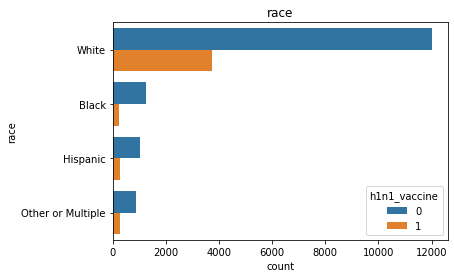

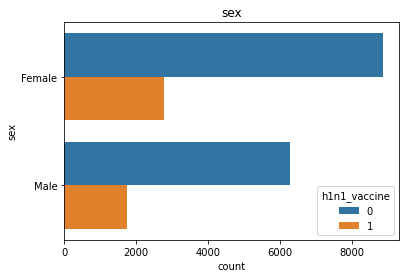

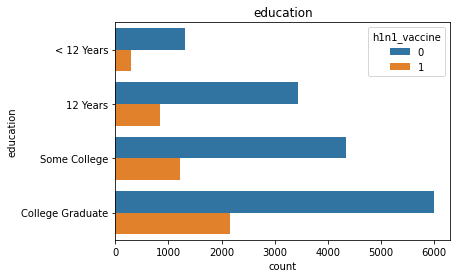

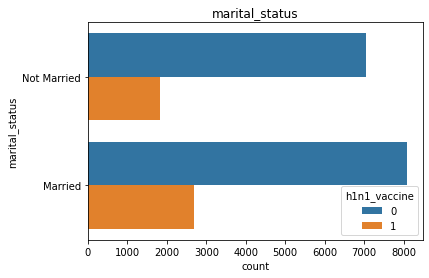

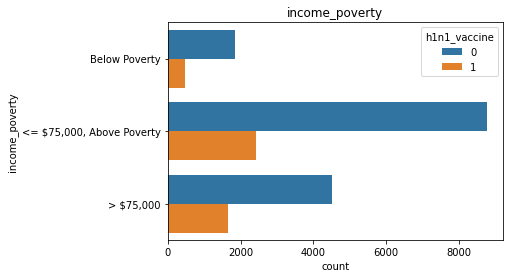

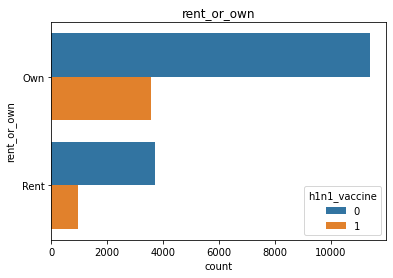

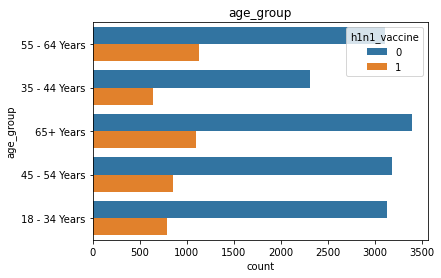

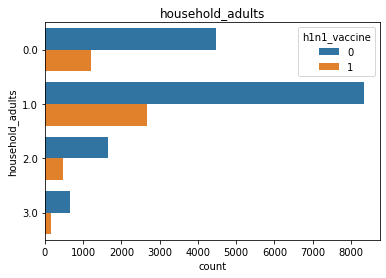

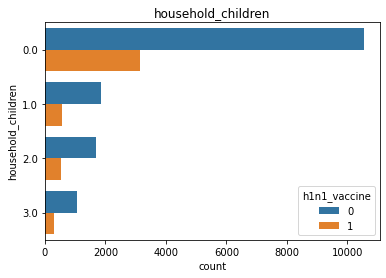

In [21]:
# creating a visual for demographic factors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

demographic = ['race', 'sex', 'education', 'marital_status', 'income_poverty', 'rent_or_own','age_group','household_adults',
               'household_children']
target = 'h1n1_vaccine'
for col in demographic:
    sns.countplot(data=df, y=col, hue=target)
    plt.title(col)
    plt.show()


Demographic Factors and Vaccine Uptake

Based on the visualizations, we can observe several trends:

- Age: Older individuals tend to have higher vaccination rates. This could be due to increased risk perception, stronger healthcare seeking behaviors, or historical experiences with influenza.
- Income: Higher income individuals are more likely to be vaccinated. This could be due to better access to healthcare, health insurance, and health information.
- Education: Higher levels of education are associated with higher vaccination rates. This could be due to better health literacy and understanding of the benefits of vaccination.
- Marital Status: Married individuals tend to have lower vaccination rates. This could be due to family responsibilities or other factors that might influence their decision-making.
- Race and Ethnicity: Racial and ethnic minorities may have lower vaccination rates due to historical mistrust of the healthcare system, lack of access to healthcare, or cultural beliefs.

We can now plot for attitudinal factors

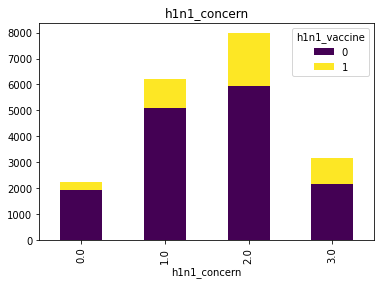

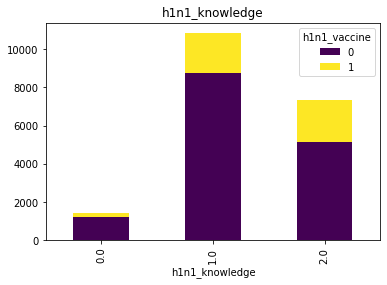

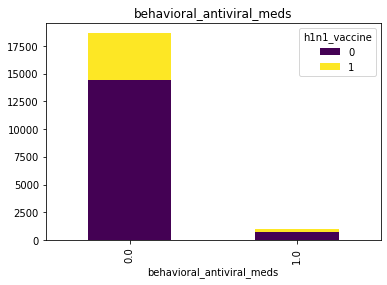

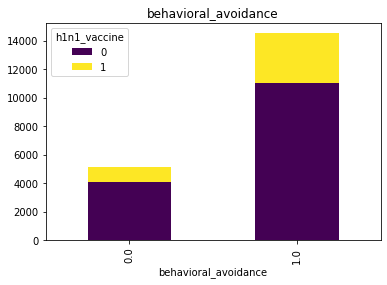

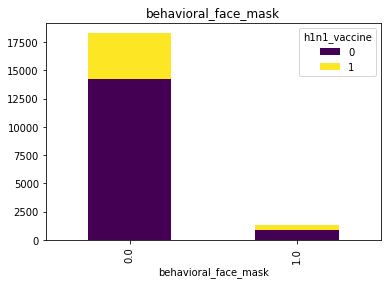

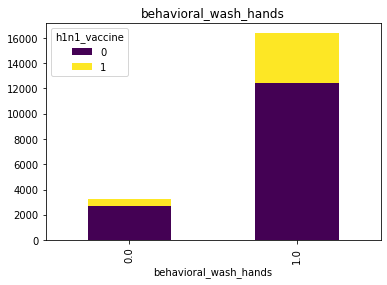

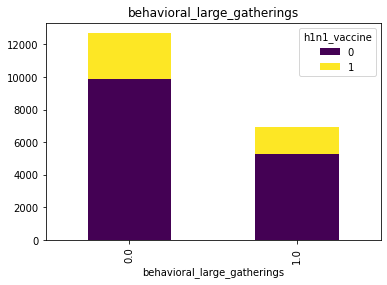

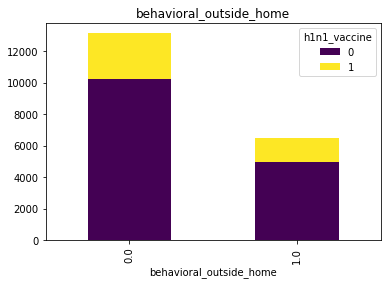

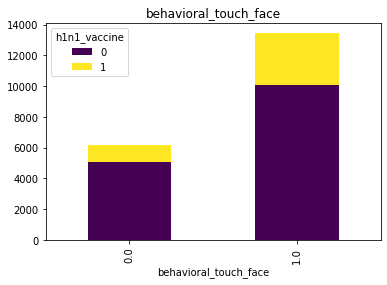

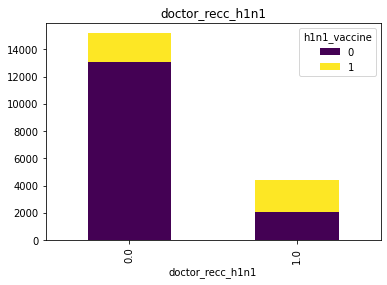

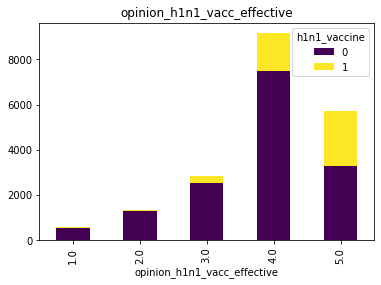

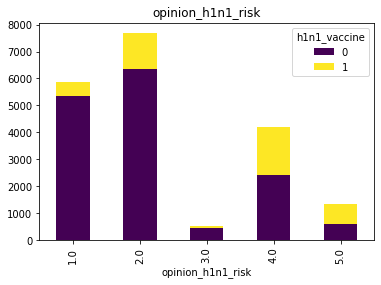

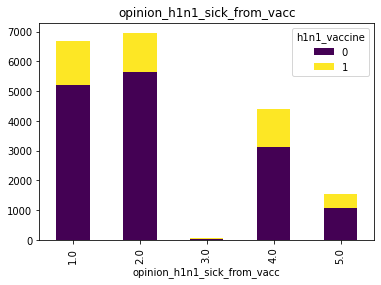

In [22]:
# plotting for the attitudinal fatcors
attitudinal = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
               'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
               'behavioral_large_gatherings', 'behavioral_outside_home',
               'behavioral_touch_face', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective',
               'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc']
target = 'h1n1_vaccine'
for col in attitudinal:
  crosstab = pd.crosstab(df[col], df[target])
  crosstab.plot(kind='bar', stacked=True, colormap='viridis')
  plt.title(col)
  plt.show()

Attitudinal Factors and Vaccine Uptake

- Perceived Risk: Individuals who perceive a higher risk of H1N1 infection are more likely to get vaccinated.
- Knowledge: Individuals with higher levels of knowledge about H1N1 are more likely to get vaccinated.
- Behavioral Intentions: Individuals who intend to engage in preventive behaviors, such as using antiviral medications, wearing masks, or washing hands, are more likely to get vaccinated.
- opinions: Perceived vaccine effectiveness and perceived risk of infection are positively associated with H1N1 vaccine uptake.
- doctors recommendation: Individuals are more likely to take the vaccine if reccomended by a doctor

### MODELING
We will start by checking the distribution of the target variable.
The model we will use is the Logistic regression model since the target variable is in binary form
Then we will create a baseline model of the attitudinal fatcors and how they affect vaccine uptake. We will look at their metrics, then improve from there.

In [23]:
# checking for distribution in the target variable
df['h1n1_vaccine'].value_counts()

h1n1_vaccine
0    15128
1     4514
Name: count, dtype: int64

The target variable has class imbalance. We will use SMOTE to oversample the smaller class before creating the baseline model.

In [24]:
# defining a function to do the logistic regression
# importing the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
# Define the variables
X = None
y = None
# creating a Logistic regresson model function
def model(X_train, X_test, y_train, y_test, logreg=None):
  # Scale the data
  scaler = StandardScaler(with_mean=False)
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  # use SMOTE to oversample the smaller class
  smote = SMOTE()
  X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
  # Instantiate the model
  logreg = LogisticRegression()
  # create a model
  logreg.fit(X_train_resampled, y_train_resampled)
  # make predictions
  y_pred = logreg.predict(X_test)
  # check the metrics
  print('Accuracy:', accuracy_score(y_test, y_pred))
  print('Precision:', precision_score(y_test, y_pred))
  print('Recall:', recall_score(y_test, y_pred))
  print('F1 Score:', f1_score(y_test, y_pred))
  y_score = logreg.fit(X_train, y_train).decision_function(X_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_score)
  print('AUC: {}'.format(auc(fpr, tpr)))
  cm = confusion_matrix(y_test, y_pred)
  print('Confusion Matrix:\n', cm)
  return cm, fpr,tpr

In [25]:
# creating the baseline model
X_baseline = df[attitudinal]
y = df['h1n1_vaccine']
# create the test and train data
X_baseline_train, X_baseline_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.3, random_state=42)
# call the model function
cm_baseline, fpr_baseline,tpr_baseline = model(X_baseline_train, X_baseline_test, y_train, y_test)

Accuracy: 0.7590361445783133
Precision: 0.47981604496678587
Recall: 0.7002237136465325
F1 Score: 0.5694360218314131
AUC: 0.8092072843889289
Confusion Matrix:
 [[3534 1018]
 [ 402  939]]


- Accuracy (0.76): The model correctly predicts 76.15% of all cases
- Precision (0.48): Of all the cases the model predicted as vaccinated, only 48.4% were correct.
- Recall (0.70): The model correctly identifies 70.4% of those who are actually vaccinated.
- F1 Score (0.57): This metric balances precision and recall, with a score of 57.3%.
- **AUC Score (0.81)**: The model's ability to distinguish between classes (vaccinated vs. not vaccinated) is 80.9%, which is reasonably good.

We have created the baseline model, whose metrics are good. We can go ahead and create another model having only the numeric columns, since most of the attitudinal data is in numeric form.

In [26]:
# creating model 2
numeric_cols = df.columns[df.dtypes != "object"].values
X_numeric = df[numeric_cols].drop('h1n1_vaccine', axis=1)
y = df['h1n1_vaccine']
# create the test and train data
X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=42)
# call the model function
cm_numeric, fpr_numeric, tpr_numeric = model(X_numeric_train, X_numeric_test, y_train, y_test)

Accuracy: 0.801119972849143
Precision: 0.5435342606903658
Recall: 0.7867263236390754
F1 Score: 0.6429006703229737
AUC: 0.8641341777311217
Confusion Matrix:
 [[3666  886]
 [ 286 1055]]


- Accuracy: the model is correct 80.04% of the time.
- Precision: when the model predicts a positive class, it's correct 54.25% of the time.
- Recall (Sensitivity): the model correctly identifies 78.52% of the actual positive cases.
- F1-Score: the F1-score is 0.6416, indicating a moderate balance between precision and recall.
- **AUC Score:** the AUC score is 0.864, which is a really good score to distinguish between the two groups

Our metric of choice has improved significantly well.
We can create a third model, which has all the columns in the dataframe.

In [27]:
# model 3 for all columns
categorical_cols = df.columns[df.dtypes == "object"].values
df_dummies = pd.get_dummies(df[categorical_cols], dtype=int, drop_first=True)
X_dummies = pd.concat([df[numeric_cols].drop('h1n1_vaccine', axis=1), df_dummies], axis=1)
y = df['h1n1_vaccine']
# create the train and test data
X_dummies_train,X_dummies_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.3, random_state=42)
# call the model function
cm_dummies, fpr_dummies, tpr_dummies = model(X_dummies_train, X_dummies_test, y_train, y_test)

Accuracy: 0.7972170371627354
Precision: 0.5376288659793814
Recall: 0.7777777777777778
F1 Score: 0.6357817738494361
AUC: 0.8647041921080326
Confusion Matrix:
 [[3655  897]
 [ 298 1043]]


- Accuracy: the model is correct 79.84% of the time.
- Precision: This measures the proportion of positive predictions that are actually positive. In this case, when the model predicts a positive class, it's correct 53.96% of the time.
- Recall (Sensitivity): the model correctly identifies 77.55% of the actual positive cases.
- F1-Score: the F1-score is 0.6364, indicating a moderate balance between precision and recall.
- **AUC Score:** the ROC AUC score is 0.8647, which is a decent score.

The model #2 is still the best of the 3. We can do a decision tree clasifier using numeric variables to see the difference.

In [28]:
# creating a decision tree classifier for comparison
from sklearn.tree import DecisionTreeClassifier
X_tree = X_numeric
y = df['h1n1_vaccine']
# instantiate the model
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
# split the data to train and test
X_tree_train, X_tree_test, y_train, y_test = train_test_split(X_tree, y, test_size=0.3, random_state=42)
# use SMOTE to oversample the smaller class
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_tree_train, y_train)
# create the model
tree.fit(X_train_resampled, y_train_resampled)
# make predictions
y_pred = tree.predict(X_tree_test)
# get the metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
y_score = tree.fit(X_tree_train, y_train).predict_proba(X_tree_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
print('AUC: {}'.format(auc(fpr, tpr)))
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Accuracy: 0.7542847446122518
Precision: 0.47650417215634605
Recall: 0.8090976882923192
F1 Score: 0.599778883360973
AUC: 0.8344102910898538
Confusion Matrix:
 [[3360 1192]
 [ 256 1085]]


The decision tree classifier does not work well for our metrics of choice(AUC score). We will just go ahead with the logistic regression model and do hyperparemeter tuning

In [29]:
# doing hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_numeric, y)
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


We have obtained the best parameters for the logistic regression model. We will now do feature selection to gat the best variables and redo the model.

In [30]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Doing feature selection
selector = SelectKBest(mutual_info_classif, k=3)
X_best_train = selector.fit_transform(X_numeric_train, y_train)
X_best_test = selector.transform(X_numeric_test)
cm_best, fpr_best, tpr_best = model(X_best_train, X_best_test, y_train, y_test)


Accuracy: 0.8028169014084507
Precision: 0.5548743102391172
Recall: 0.6748695003728561
F1 Score: 0.6090174966352626
AUC: 0.8378361110783469
Confusion Matrix:
 [[3826  726]
 [ 436  905]]


Looking at the metrics this time, the model has increased precision slightly while lowering recall by a lot. Our metic of choice, the AUC score has been signifu=icantly reduced. Model #2 is still the best.

In [31]:
# recreating model 2 with new parameters
X_numeric = df[numeric_cols].drop('h1n1_vaccine', axis=1)
y = df['h1n1_vaccine']
regressor = LogisticRegression(C=1, penalty='l2', solver='liblinear')
cm_new, fpr_new,tpr_new = model(X_numeric_train, X_numeric_test, y_train, y_test, regressor)

Accuracy: 0.8012896657050738
Precision: 0.5436793422404933
Recall: 0.7889634601043997
F1 Score: 0.6437480985701246
AUC: 0.8641341777311217
Confusion Matrix:
 [[3664  888]
 [ 283 1058]]


Looking at the metrics, not much difference from model #2. We can create ROC curves for all the models and compare

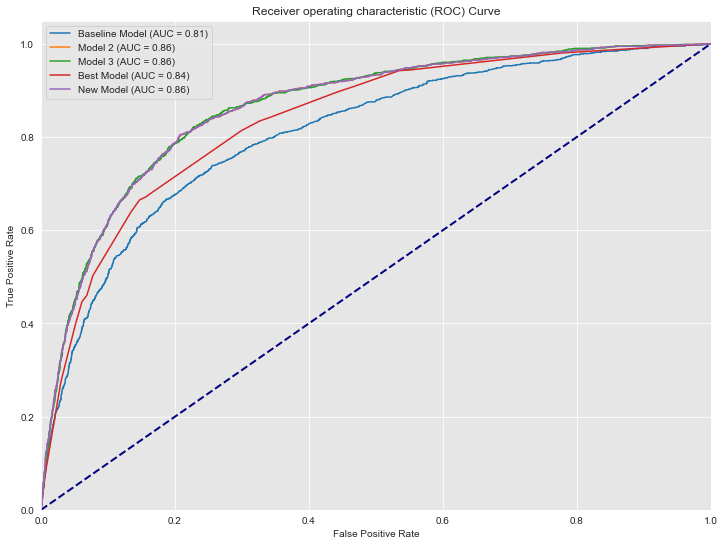

In [32]:
# creating the roc curves for the models
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(12, 9))
lw=2
#plotting for the roc curves
plt.plot(fpr_baseline, tpr_baseline, label='Baseline Model (AUC = %0.2f)' % auc(fpr_baseline, tpr_baseline))
plt.plot(fpr_numeric, tpr_numeric, label='Model 2 (AUC = %0.2f)' % auc(fpr_numeric, tpr_numeric))
plt.plot(fpr_dummies, tpr_dummies, label='Model 3 (AUC = %0.2f)' % auc(fpr_dummies, tpr_dummies))
plt.plot(fpr_best, tpr_best, label='Best Model (AUC = %0.2f)' % auc(fpr_best, tpr_best))
plt.plot(fpr_new, tpr_new, label='New Model (AUC = %0.2f)' % auc(fpr_new, tpr_new))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend()
plt.show()

From the graph, it can be seen that the model #2 and #3 have the best ROC curves. We can now look at the columns contained in model 2 which will give us the best predictors for vaccine uptake.

Considering that our metrics of choice were Recall and AUC, the target was almost achieved.

In [33]:
# look at the features in model 2
print(X_numeric.columns)

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'seasonal_vaccine'],
      dtype='object')


## CONCLUSION

The model #2 demonstrates strong performance in predicting H1N1 vaccine uptake, particularly considering the complexity of human behavior and the numerous factors influencing vaccination decisions.

From the given features, we can identify several key factors that significantly impact vaccine uptake:

- Attitudinal Factors:

Individuals with higher perceived risk of H1N1 infection are more likely to get vaccinated.

Belief in the effectiveness of the vaccine is a strong predictor of vaccination behavior.

Concerns about side effects can negatively impact vaccine uptake.
- Behavioral Intentions:

Individuals who intend to engage in preventive behaviors (e.g., wearing masks, washing hands) are more likely to get vaccinated.
- Social and Demographic Factors:

Household size and the presence of children may influence vaccination decisions.
- Healthcare Access:

Access to healthcare providers and insurance coverage can impact vaccine uptake.
- Improving the Model:

While the model performs well, there are opportunities for further improvement.

While the current AUC is good, there are always opportunities for improvement:

1. Feature Engineering:
Create new features by combining or transforming existing ones.
Consider incorporating external data sources (e.g., socio-economic indicators, climate data) if relevant.
2. Model Selection:
Consider alternative models like Random Forest, XGBoost, or LightGBM, which often perform well on complex datasets.
Use ensemble methods to combine multiple models and improve overall performance.
3. Data Quality and Quantity:
Gather more data to improve the model's generalization ability.

By continuously evaluating and refining the model, we can strive to improve its performance and gain deeper insights into the factors influencing H1N1 vaccine uptake.

## RECOMMENDATIONS
Based on the analysis of the H1N1 vaccine uptake model, the following recommendations can be made to the public health ministry:

1. Targeted Public Health Campaigns
2. Improve Access to Vaccination
3. Address Vaccine Hesitancy
4. Utilize Data-Driven Insights

By implementing these recommendations, the public health ministry can effectively increase H1N1 vaccine uptake, protect public health, and mitigate the impact of future outbreaks.